<a href="https://colab.research.google.com/github/taehyunKIMGH/python_cctv_data/blob/main/%EA%B9%80%ED%83%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.stats import pearsonr

cctv 개수<br>[사용한 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=127&tblId=DT_2014_82)

In [ ]:

f_cctv = open('/content/CCTV_설치_운영_현황_20221217162838.csv', encoding = 'cp949')
data_cctv = csv.reader(f_cctv)
cctv = []

for row in data_cctv:
  if '지역별' in row[0]:
    cctv.append(int(row[8]))

범죄 건수와 범죄 검거 건수<br>[사용한 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20321&conn_path=I2)



In [ ]:
f_arrest = open('/content/중요범죄발생및검거현황_시도__20221217162852.csv', encoding='cp949')
data_arrest =  csv.reader(f_arrest)
crime = []
arrest = []

for row in data_arrest:
  if '전국' not in row[0]:
    if '경찰청' not in row[0]:
      if '해양경비 안전본부' not in row[0]:
        if '총범죄' in row[1]:
          crime.append(row[2])
          arrest.append(row[3])

print(crime, arrest)


['257969', '100439', '67915', '76584', '39392', '39982', '29085', '5937', '357243', '39593', '43397', '54223', '43650', '48380', '65553', '87879', '25515'] ['189140', '78412', '54752', '60697', '33461', '31997', '24062', '4062', '282646', '33202', '34798', '42505', '35661', '39959', '54086', '70058', '20222']


범죄 검거율

In [ ]:
arrest_rate = []

for i in range(len(crime)):
  arrest_rate.append((int(arrest[i])/int(crime[i]))*100)


print(arrest_rate)

[73.31888715310755, 78.06927587889166, 80.61842008392844, 79.25545805912462, 84.94364337936638, 80.02851283077385, 82.72992951693313, 68.41839312784235, 79.11869511788895, 83.85825777283863, 80.18526626264489, 78.38924441657599, 81.69759450171821, 82.59404712691195, 82.50728418226473, 79.72097998384142, 79.25533999608074]


지역의 면적<br>[사용한 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1ZGA17&conn_p-ath=I2)

In [ ]:
area = []

data_area = pd.read_csv('/content/지역별_면적_20221217162903.csv', skiprows=17, header=None, encoding = 'cp949')

for row in data_area[5]:
  area.append(row)

print(area)

 

[605, 770, 883, 1065, 501, 540, 1062, 465, 10195, 16830, 7407, 8246, 8070, 12348, 19034, 10541, 1850]


지역 면적 / cctv 개수

In [ ]:
cctv_area = []

for i in range(len(area)):
  cctv_area.append(int(area[i]*1000000)/int(cctv[i]))

print(cctv_area)

[333.1778503365096, 3180.687854729311, 1431.9631030299886, 3180.414618559287, 1769.1927396002543, 2423.7745351065787, 8973.38403041825, 2665.1535472333985, 5260.645777164308, 60324.094152899896, 30269.84172391387, 30877.303347225497, 37818.43402628077, 45265.588914549655, 54335.817849119194, 16183.063129452223, 35837.43365231878]


시각화

<function matplotlib.pyplot.show(*args, **kw)>

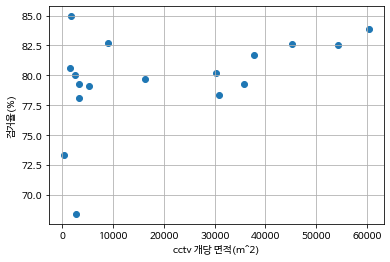

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.scatter(cctv_area,arrest_rate)
plt.xlabel('cctv 개당 면적(m^2)')
plt.ylabel('검거율(%)')
plt.grid(True)
plt.show

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
print(pearsonr(cctv_area, arrest_rate))

(0.4368858596749064, 0.07951887478767367)
